<a href="https://colab.research.google.com/github/CristianRiascos/Alura-TelecomX-Challenge/blob/master/Challenge_Etapa2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción

In [ ]:
import pandas as pd

In [ ]:
# Obtener los datos
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
json = pd.read_json(url)
json.head(4)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# Transformación

In [ ]:
import numpy as np

## Normalizar las columnas Customer, Phone, Internet y Account

In [ ]:
# Normalizar las columnas
columns = [ 'customer', 'phone', 'internet', 'account' ]
normalized_columns = [ json[['customerID', 'Churn'] ]]

for column in columns:
  normalized = pd.json_normalize( json[column] )
  normalized_columns.append(normalized)

data = pd.concat(normalized_columns, axis=1)
data.head(4)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85


In [ ]:
## Conocer los datos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Note que la columna Charges.Total que representa cargos totales es de tipo Objeto y no Float. Al intentar realizar el cambio a valores númericos se encontró que existen espacios (estos valores no cuentan en .info como nulos)

In [ ]:
# Esto da error si se ejecuta porque existen espacios
# data['Charges.Total'] = pd.to_numeric( data['Charges.Total'] )

## Limpiar valores ausentes

In [ ]:
data.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
# Como se encontraron espacios anteriormente, se verifica si existen espacios en todas las columnas
for col in data.columns:
  res = ( data[col].astype(str).str.strip() == '' ).sum()
  print( f"{col} : {res} espacios" )

customerID : 0 espacios
Churn : 224 espacios
gender : 0 espacios
SeniorCitizen : 0 espacios
Partner : 0 espacios
Dependents : 0 espacios
tenure : 0 espacios
PhoneService : 0 espacios
MultipleLines : 0 espacios
InternetService : 0 espacios
OnlineSecurity : 0 espacios
OnlineBackup : 0 espacios
DeviceProtection : 0 espacios
TechSupport : 0 espacios
StreamingTV : 0 espacios
StreamingMovies : 0 espacios
Contract : 0 espacios
PaperlessBilling : 0 espacios
PaymentMethod : 0 espacios
Charges.Monthly : 0 espacios
Charges.Total : 11 espacios


In [ ]:
# La cantidad de datos con espacios en Churn (3.08%) y Charges.Total (0.15%) son pocas, se deciden eliminar estos registros
data = data[ ~( data['Churn'].str.strip() == '' ) ]
data = data[ ~( data['Charges.Total'].str.strip() == '' ) ]
data.reset_index( drop=True, inplace=True )

## Corrección de formatos

Se debe de cambiar Charges.Total a Float

In [ ]:
data['Charges.Total'] =  data['Charges.Total'].astype( np.float64 )

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


## Verificar datos duplicados

In [ ]:
data.duplicated().sum()

np.int64(0)

## Aañadir columna de las cuentas diarias

In [ ]:
data['Charges.Daily'] = round( (data['Charges.Monthly'] / 30), 2 )

In [ ]:
data.head(4)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27


## Estandarizar datos

Estandarizar a SeniorCitizen

In [ ]:
data['SeniorCitizen'].unique()

array([0, 1])

In [ ]:
data['SeniorCitizen'] = data['SeniorCitizen'].map({
    0: 'No',
    1: 'Sí'
})

Cambiar InternetService a español

In [ ]:
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
data['InternetService'] = data['InternetService'].apply( lambda x:
                                                        x.replace( 'Fiber optic', 'Fibra Óptica' )
                                                        )

Cambiar Contract a español

In [ ]:
data['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [ ]:
data['Contract'] = data['Contract'].apply( lambda x: x \
                                          .replace( 'One year', 'Un Año' ) \
                                          .replace( 'Month-to-month', 'Mes a Mes' ) \
                                          .replace( 'Two year', 'Dos Años' )
                                          )

Cambiar PaymentMethod a español

In [ ]:
data['PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [ ]:
data['PaymentMethod'] = data['PaymentMethod'].apply( lambda x: x \
                                                    .replace( 'Mailed check', 'Cheque por Correo' ) \
                                                    .replace( 'Electronic check', 'Cheque Electrónico' ) \
                                                    .replace( 'Credit card (automatic)', 'Tarjeta de Crédito (Automático)' ) \
                                                    .replace( 'Bank transfer (automatic)', 'Transferencia Bancaria (Automático)' )
                                                    )

# Carga y Análisis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data.describe()

,tenure,Charges.Monthly,Charges.Total,Charges.Daily
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159891
std,24.545260,30.085974,2266.771362,1.002955
min,1.000000,18.250000,18.800000,0.610000
25%,9.000000,35.587500,401.450000,1.187500
50%,29.000000,70.350000,1397.475000,2.340000
75%,55.000000,89.862500,3794.737500,2.992500
max,72.000000,118.750000,8684.800000,3.960000


## Distribución Evasión

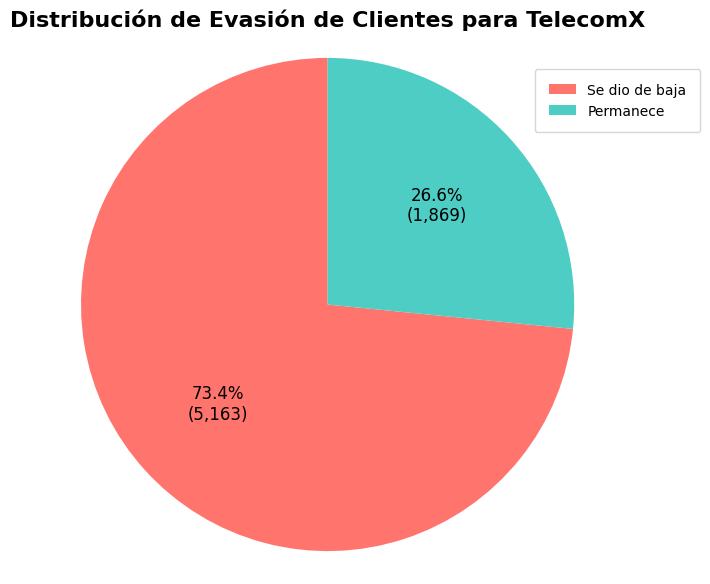

In [ ]:
# Obtener el conteo de datos de la variable Churn
evasion = data['Churn'].value_counts()
total = sum(evasion.values)

# Cambiar a etiquetas más legibles para la leyenda
evasion.index = evasion.index.map({
    'Yes': 'Permanece',
    'No': 'Se dio de baja'
})

# Realizar el gráfico
plt.figure(figsize=(7, 7))
plt.pie( evasion.values,
         autopct=lambda pct: f'{pct:.1f}%\n({int(round(pct * total / 100.0)):,})',
         textprops={'fontsize': 12},
         startangle=90,
         colors=['#FF746C', '#4ecdc4']
         )

# Modificar título y leyenda
plt.title( 'Distribución de Evasión de Clientes para TelecomX', fontsize=16, fontweight='bold' )
plt.axis('equal')
plt.legend( evasion.index,  loc='upper right', bbox_to_anchor=(1.20, 0.95), borderpad=1.0 )
plt.show()

## Recuento de evasión de clientes por variables categóricas

In [ ]:
categorical_variables = list( data.select_dtypes(include='object').columns )
categorical_variables.remove( 'customerID' )

In [ ]:
df_categorical = data[categorical_variables].copy()
df_categorical.head(4)

,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,No,Female,No,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Un Año,Yes,Cheque por Correo
1,No,Male,No,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Mes a Mes,No,Cheque por Correo
2,Yes,Male,No,No,No,Yes,No,Fibra Óptica,No,No,Yes,No,No,No,Mes a Mes,Yes,Cheque Electrónico
3,Yes,Male,Sí,Yes,No,Yes,No,Fibra Óptica,No,Yes,Yes,No,Yes,Yes,Mes a Mes,Yes,Cheque Electrónico


In [ ]:
df_categorical['Churn'] = df_categorical['Churn'].apply( lambda x: x \
                                                        .replace( 'No', 'Se dio de baja' ) \
                                                        .replace( 'Yes', 'Permanece' )
                                                        )

### Función para realizar los gráficos

In [ ]:
def count_graph_categorical( column, title, legend_title, legend_labels, show_labels ):
  fig, ax = plt.subplots(figsize=(9, 5))

  sns.countplot(
      data=df_categorical,
      x='Churn',
      hue=column,
      palette='Set2',
      ax=ax
  )

  # Títulos y etiquetas
  ax.set_title(title, fontsize=14, pad=10)
  ax.set_xlabel('Churn', fontsize=11)
  ax.set_ylabel('Cantidad de clientes', fontsize=11)

  # Mostrar valores encima de las barras
  for container in ax.containers:
      ax.bar_label(container, fontsize=9)

  ax.legend(
      title=legend_title,
      labels=legend_labels
  )

  if show_labels:
    handles, labels = ax.get_legend_handles_labels()
    print(labels)

  plt.tight_layout()
  plt.show()

### Gráfico de SeniorCitizen

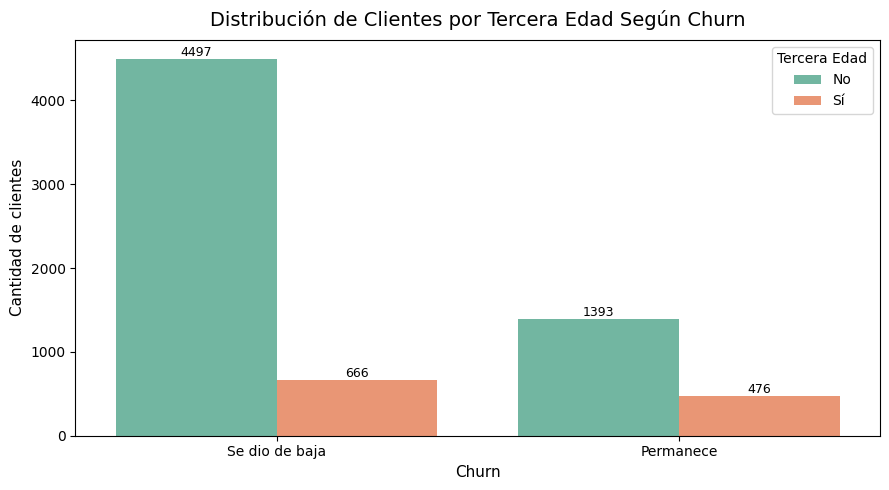

In [ ]:
count_graph_categorical( 'SeniorCitizen',
                        'Distribución de Clientes por Tercera Edad Según Churn',
                         'Tercera Edad',
                         ['No','Sí'],
                         False )

### Grafico de Género

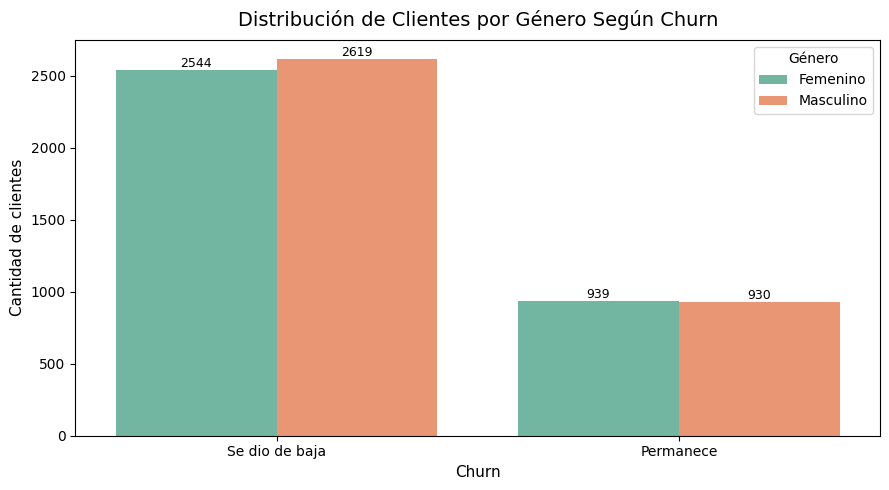

In [ ]:
count_graph_categorical( 'gender',
                        'Distribución de Clientes por Género Según Churn',
                         'Género',
                         ['Femenino', 'Masculino'],
                         False )

### Gráfico de Partner

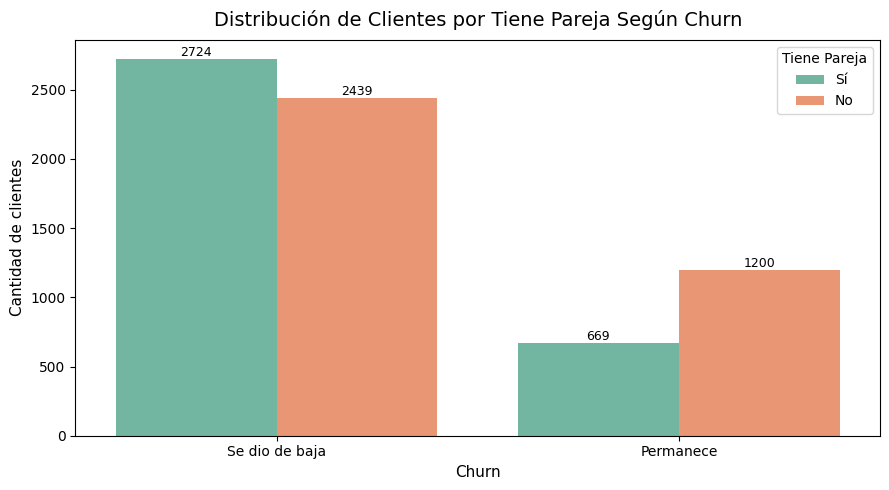

In [ ]:
count_graph_categorical( 'Partner',
                        'Distribución de Clientes por Tiene Pareja Según Churn',
                         'Tiene Pareja',
                         ['Sí', 'No'],
                         False )

### Grafico de InternetService

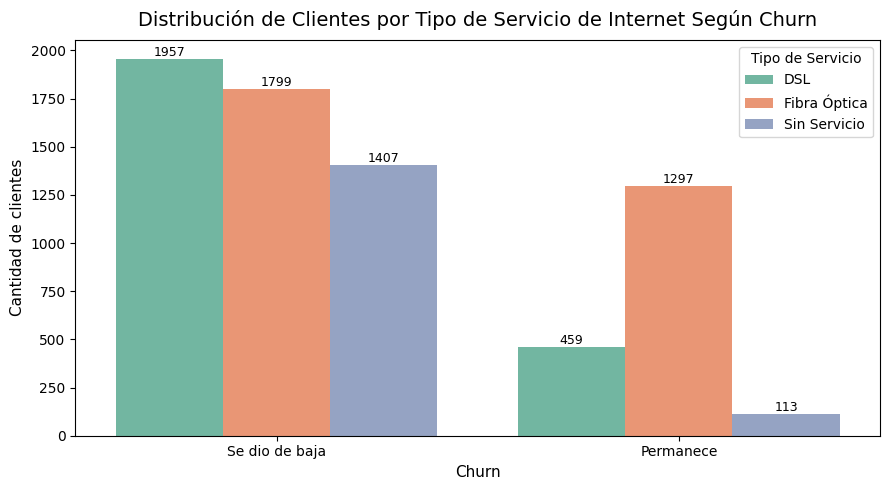

In [ ]:
count_graph_categorical( 'InternetService',
                        'Distribución de Clientes por Tipo de Servicio de Internet Según Churn',
                         'Tipo de Servicio',
                         ['DSL', 'Fibra Óptica', 'Sin Servicio'],
                         False )

### Gráfico de Contract

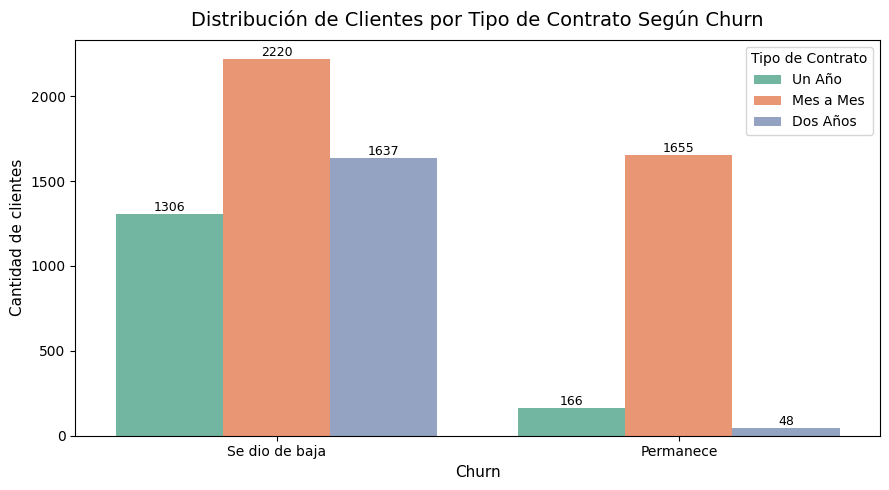

In [ ]:
count_graph_categorical( 'Contract',
                        'Distribución de Clientes por Tipo de Contrato Según Churn',
                         'Tipo de Contrato',
                         ['Un Año', 'Mes a Mes', 'Dos Años'],
                         False )

### Gráfico de PaymentMethod

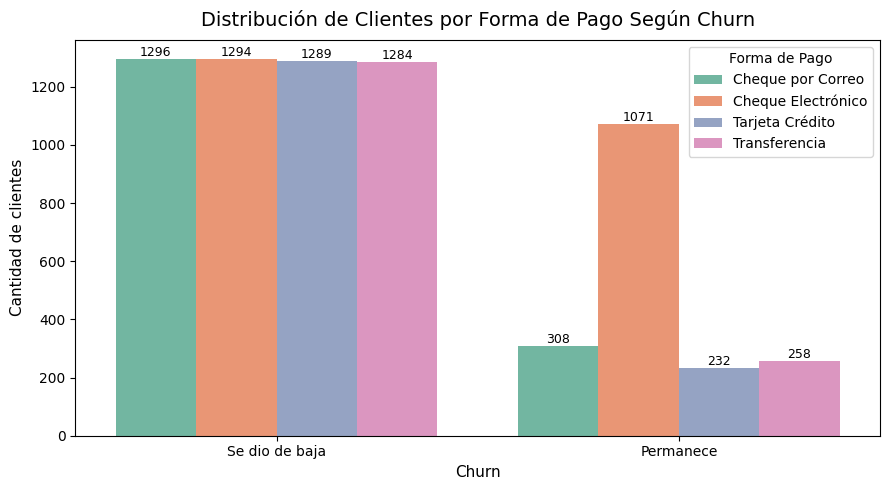

In [ ]:
count_graph_categorical( 'PaymentMethod',
                        'Distribución de Clientes por Forma de Pago Según Churn',
                         'Forma de Pago',
                         ['Cheque por Correo', 'Cheque Electrónico', 'Tarjeta Crédito', 'Transferencia'],
                         False )

## Recuento de evasión de clientes por varibales numéricas

In [ ]:
# Tomar únicamente las columnas numéricas del dataset
numerical_columns = list( data.select_dtypes( include=['int64','float64'] ).columns )
numerical_columns

['tenure', 'Charges.Monthly', 'Charges.Total', 'Charges.Daily']

In [ ]:
# Añadir la columna Churn
df_numerical = data[numerical_columns].copy()
df_numerical['Churn'] = data['Churn']
df_numerical.head(4)

,tenure,Charges.Monthly,Charges.Total,Charges.Daily,Churn
0,9,65.6,593.30,2.19,No
1,9,59.9,542.40,2.00,No
2,4,73.9,280.85,2.46,Yes
3,13,98.0,1237.85,3.27,Yes


In [ ]:
df_numerical['Churn'] = df_numerical['Churn'].apply( lambda x: x \
                                                        .replace( 'No', 'Se dio de baja' ) \
                                                        .replace( 'Yes', 'Permanece' )
                                                        )

### Función para realizar los gráficos numéricos

In [ ]:
def boxplot_numerical(column, title, ylabel):
    fig, ax = plt.subplots(figsize=(9, 5))

    sns.boxplot(
        data=df_numerical,
        x='Churn',
        y=column,
        hue='Churn',
        palette='Set2',
        legend=False,
        ax=ax
    )

    ax.set_title(title, fontsize=14, pad=10)
    ax.set_xlabel('Churn', fontsize=11)
    ax.set_ylabel(ylabel, fontsize=11)

    plt.tight_layout()
    plt.show()

### Gráfico de Charges.Daily

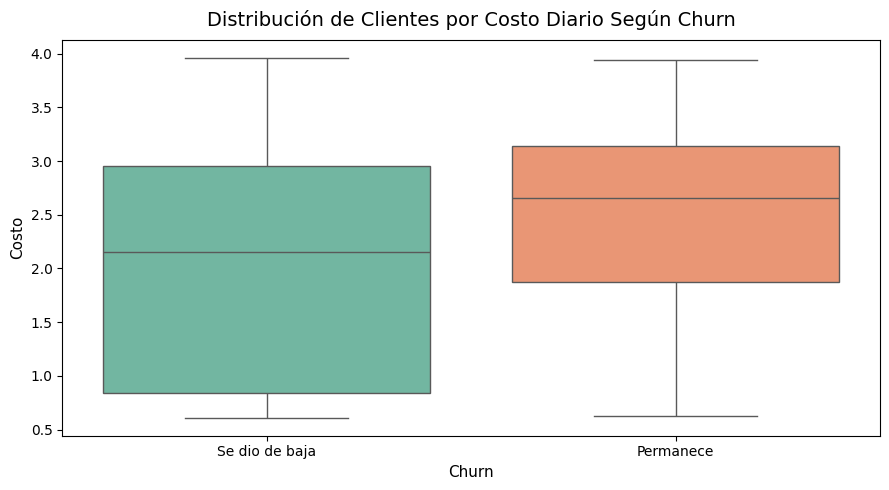

In [ ]:
boxplot_numerical( 'Charges.Daily',
                   'Distribución de Clientes por Costo Diario Según Churn',
                   'Costo')

### Gráfico de Charges.Monthly

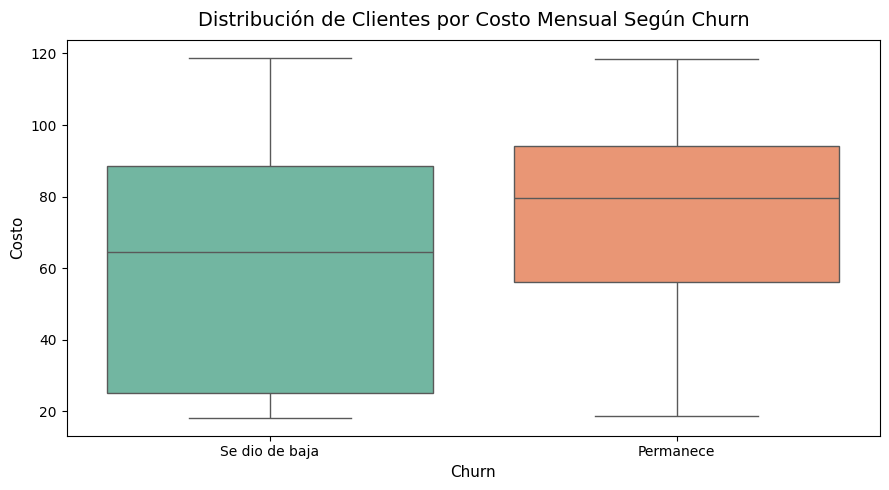

In [ ]:
boxplot_numerical( 'Charges.Monthly',
                   'Distribución de Clientes por Costo Mensual Según Churn',
                   'Costo')

### Gráfico de Charges.Total

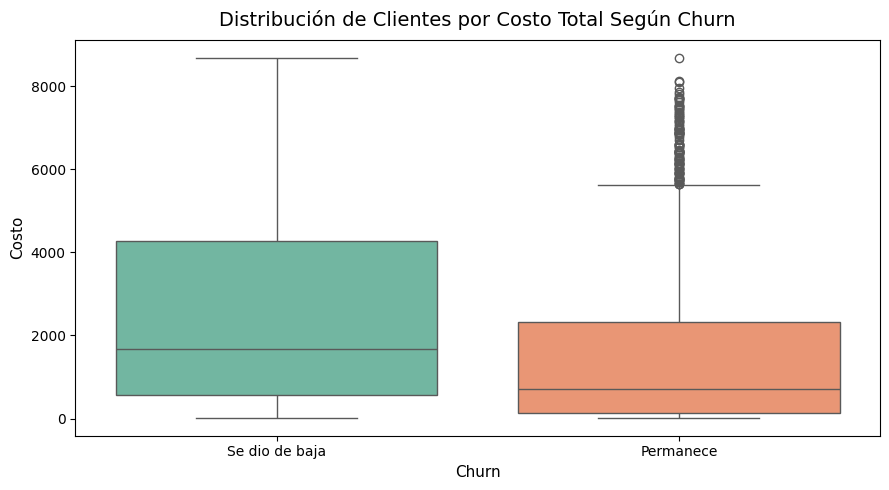

In [ ]:
boxplot_numerical( 'Charges.Total',
                   'Distribución de Clientes por Costo Total Según Churn',
                   'Costo')

### Gráfico de Tenure

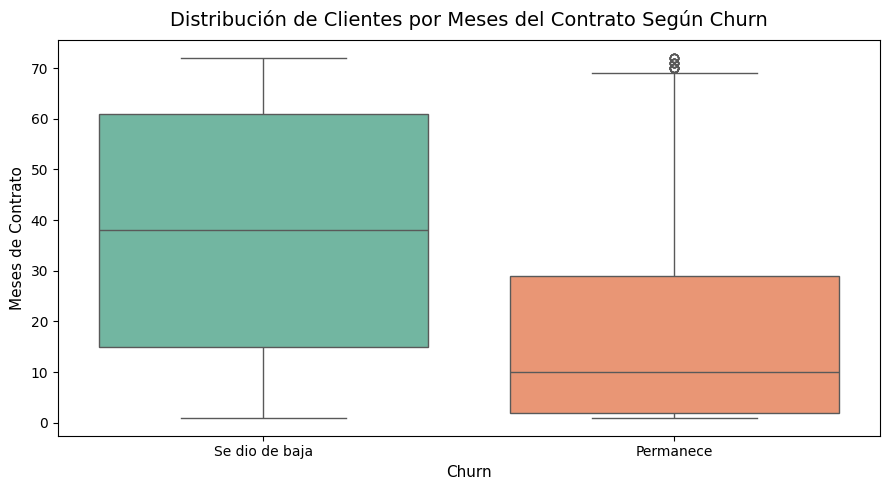

In [ ]:
boxplot_numerical( 'tenure',
                   'Distribución de Clientes por Meses del Contrato Según Churn',
                   'Meses de Contrato')